In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Read the csv file for QMOF dataset
df = pd.read_csv('../data/QMOF/qmof_database/qmof_database/qmof.csv', sep=',')

/var/folders/35/gl327bks7436kv0058ybgznc0000gn/T/ipykernel_49734/144469287.py:2: DtypeWarning: Columns (40,41,43,44,45,46,47,49,50,51,52,53,55,56,57,65,66,67,68,69,77,78,79,80,81,89,90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/QMOF/qmof_database/qmof_database/qmof.csv', sep=',')


## The exploratory data analysis (EDA) of the dataset is carried out by considering:
#### **Method 1.** Each MOF at *all* levels of theories as an individual data point
#### **Method 2.** Each MOF at *each* level of theory as an individual data point 


## Method 2: each MOF at each level of theory taken to be an independent data point

### reorganizing the dataset
... into a new dataframe with up to four rows per MOF with one set of DFT inputs and outputs per row

In [68]:
# start by decomposing column names
info_column_names = df.columns[0:22].tolist()
dft_levels = ['pbe', 'hle17', 'hse06_10hf', 'hse06']
dft_inputs = [col.split('.')[-1] for col in df.columns[22:28]]
dft_outputs = [col.split('.')[-1] for col in df.columns[28:40]]

#  All columns are given by info_columns_names and all combinations of {'input.', 'output.'} + <dft level> + '.' + {<dft input>, <dft ouput>}?
set(df.columns) == set(
    info_column_names
    + ['inputs.' + level + '.' + i for level in dft_levels for i in dft_inputs]
    + ['outputs.' + level + '.' + i for level in dft_levels for i in dft_outputs]
)

True

In [ ]:
# define a function that drops the DFT level of theory part of the inputs/ouputs column names, leaving other (info) column names untouched
def drop_level_from_column_name(col):
    if col.startswith('inputs') or col. startswith('outputs'):
        return '.'.join(col.split('.')[::2])
    else:
        return col

# remove irrelevant columns based on domain knowledge.
df_by_level.drop([
    'name', 'info.formula', 'info.formula_reduced', 'info.mofid.mofid', 'info.mofid.mofkey', 'info.mofid.topology', 'info.symmetry.spacegroup',
    'info.symmetry.spacegroup_number', 'info.symmetry.spacegroup_crystal', 'info.symmetry.pointgroup', 'info.synthesized', 'info.source', 'info.doi',
    'inputs.pseudopotentials', 'inputs.encut', 'inputs.kpoints','inputs.gamma'
], axis=1, inplace=True)

# Note: I kept the inputs.theory column as a potential feature, since the information about which level of theory data came from
# is otherwise lost in the above procedure.
df_by_level['inputs.theory'].unique()

array(['PBE-D3BJ', 'HLE17//PBE-D3BJ', 'HSE06-D3BJ-HF10//PBE-D3BJ',
       'HSE06-D3BJ//PBE-D3BJ'], dtype=object)

In [70]:
# relabel levels of theory in those the entries to make them more readable and match the paper:
df_by_level.replace(to_replace = {'PBE-D3BJ': 'PBE', 'HLE17//PBE-D3BJ': 'HLE17', 'HSE06-D3BJ-HF10//PBE-D3BJ': 'HSE06*',
       'HSE06-D3BJ//PBE-D3BJ': 'HSE06'}, inplace = True)
df_by_level

/var/folders/35/gl327bks7436kv0058ybgznc0000gn/T/ipykernel_49734/1432943307.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_by_level.replace(to_replace = {'PBE-D3BJ': 'PBE', 'HLE17//PBE-D3BJ': 'HLE17', 'HSE06-D3BJ-HF10//PBE-D3BJ': 'HSE06*',


qmof_id info.mofid.smiles_nodes  \
0      qmof-8a95c27   ['O', '[Ba]', '[Cu]']   
1      qmof-019ba28                     NaN   
2      qmof-830ed1c                ['[Co]']   
3      qmof-5bd4a24                ['[Co]']   
4      qmof-644aab4            ['[Zn][Zn]']   
...             ...                     ...   
15951  qmof-f73a75b                ['[Fe]']   
15954  qmof-600a106                     NaN   
15955  qmof-64eac3c                     NaN   
15959  qmof-92305e2      ['[OH2][Nd][OH2]']   
15961  qmof-55d409b                ['[Cu]']   

                               info.mofid.smiles_linkers  \
0                                            ['[O-]C=O']   
1                                                    NaN   
2                                  ['[O-]C(=O)c1ccncc1']   
3                                  ['[O-]C(=O)c1ccncc1']   
4      ['[O-]C(=O)c1cccc(c1)c1nccs1', 'n1ccc(cc1)c1cc...   
...                                                  ...   
15951                   ['n1ccc(cc1)c1ccc(cc1)c1ccncc1']   
15954                                                NaN   
15955                                                NaN   
15959                    ['[O-]C(=O)Cn1nnc(n1)c1cccnc1']   
15961           ['Cc1nc2c(n1CCCCn1c(C)nc3c1cccc3)cccc2']   

                                       info.mofid.smiles  info.natoms  \
0                                    O.[Ba].[Cu].[O-]C=O           39   
1                                                    NaN          128   
2                                 [Co].[O-]C(=O)c1ccncc1          108   
3                                 [Co].[O-]C(=O)c1ccncc1          108   
4      [O-]C(=O)c1cccc(c1)c1nccs1.[Zn][Zn].n1ccc(cc1)...          102   
...                                                  ...          ...   
15951                  [Fe].n1ccc(cc1)c1ccc(cc1)c1ccncc1           67   
15954                                                NaN           66   
15955                                                NaN           74   
15959         [O-]C(=O)Cn1nnc(n1)c1cccnc1.[OH2][Nd][OH2]          100   
15961          Cc1nc2c(n1CCCCn1c(C)nc3c1cccc3)cccc2.[Cu]           83   

       info.pld  info.lcd  info.density  info.volume inputs.theory  ...  \
0       0.68822   1.35480      2.763246   408.857471           PBE  ...   
1       1.18570   2.13507      3.229952  1781.965032           PBE  ...   
2       2.36128   4.21176      1.557644  1292.643180           PBE  ...   
3       2.14542   3.27957      1.616139  1245.856916           PBE  ...   
4       1.33452   2.03948      1.596537  1148.155557           PBE  ...   
...         ...       ...           ...          ...           ...  ...   
15951   1.18551   2.89246      1.495041   707.036341         HSE06  ...   
15954   1.37328   2.56785      1.711368   786.642474         HSE06  ...   
15955   1.12322   2.17481      1.692097   755.001744         HSE06  ...   
15959   1.01659   1.93464      1.892463  1095.155492         HSE06  ...   
15961   1.28465   1.95192      1.420981   799.593592         HSE06  ...   

       outputs.energy_elec  outputs.net_magmom  outputs.bandgap  outputs.cbm  \
0              -235.272007                 1.0         0.632527     1.237645   
1              -656.065494                 0.0         1.134232     3.430440   
2              -751.387618                12.0         0.345448     1.091140   
3              -751.263482                12.0         0.342645     1.308492   
4              -691.920725                 0.0         1.973007     1.855009   
...                    ...                 ...              ...          ...   
15951          -536.320647                 0.0         2.518369     2.654818   
15954          -524.633244                 0.0         2.149613     1.953162   
15955          -574.486836                 0.0         3.956167     2.750360   
15959          -807.094882                 0.0         4.557899     3.212936   
15961          -625.186032                 1.0         3.713703     

In [71]:
df_by_level.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52754 entries, 0 to 15961
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   qmof_id                    52754 non-null  object 
 1   info.mofid.smiles_nodes    44124 non-null  object 
 2   info.mofid.smiles_linkers  43699 non-null  object 
 3   info.mofid.smiles          44124 non-null  object 
 4   info.natoms                52754 non-null  int64  
 5   info.pld                   52754 non-null  float64
 6   info.lcd                   52754 non-null  float64
 7   info.density               52754 non-null  float64
 8   info.volume                52754 non-null  float64
 9   inputs.theory              52754 non-null  object 
 10  inputs.spin                52754 non-null  bool   
 11  outputs.energy_total       52754 non-null  float64
 12  outputs.energy_vdw         52754 non-null  float64
 13  outputs.energy_elec        52754 non-null  float64


In [72]:
numerical_columns = [
    'info.natoms', 'info.pld', 'info.lcd', 'info.density', 'info.volume',
    'outputs.energy_total','outputs.energy_vdw','outputs.energy_elec','outputs.net_magmom','outputs.bandgap','outputs.cbm','outputs.vbm'
]

### exploration of numerical data
#### (roughly) reproduced Figure 1 from the '22 QMOF paper (Rosen, et. al.)

<Axes: xlabel='inputs.theory', ylabel='outputs.bandgap'>

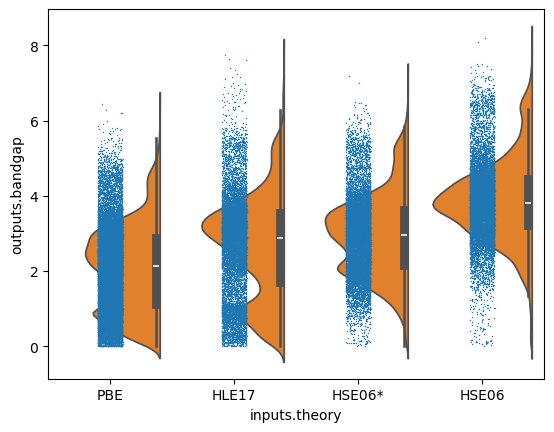

In [73]:
sns.stripplot(
    data = df_by_level, y = 'outputs.bandgap',x = 'inputs.theory',
    size = 1, dodge = True
)
sns.violinplot(
    data = df_by_level, y = 'outputs.bandgap', x = 'inputs.theory',
    split = True
)

#### Pair plots of bandgap vs. numerical data:

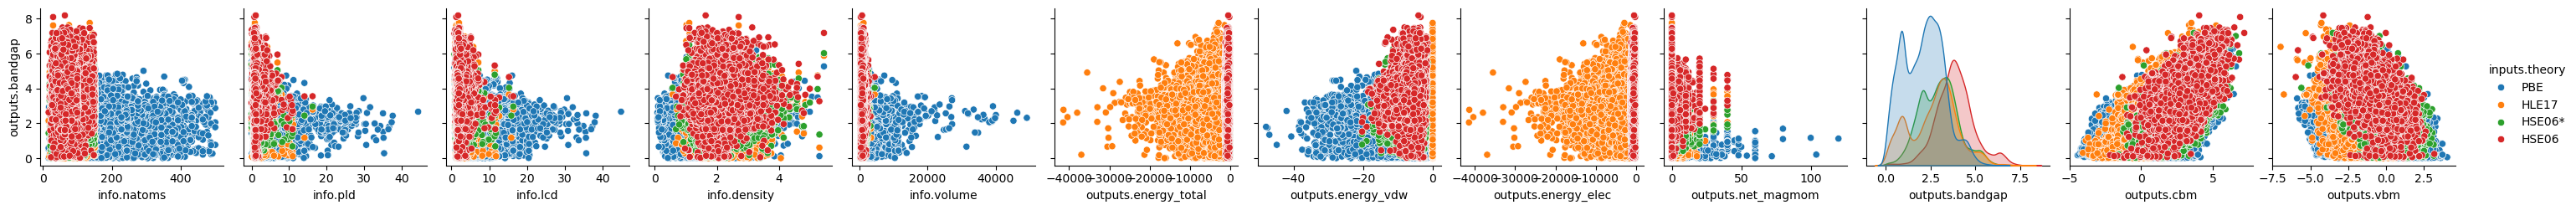

In [74]:
sns.pairplot(df_by_level, y_vars = ['outputs.bandgap'], x_vars = numerical_columns, hue = 'inputs.theory')

It looks like DFT was only done at higher levels of theory for the smaller MOFs (at most 150 atoms):

In [75]:
df_by_level.groupby('inputs.theory')['info.natoms'].max()

inputs.theory
HLE17     150
HSE06     150
HSE06*    150
PBE       500
Name: info.natoms, dtype: int64

Would this be considered a form of bias for the data coming from the higher levels of theory? There does seem to be correlation between the other numerical data and number of atoms, some very much expected, like a positive correlation between number of atoms and volume. But, in most cases, the range of possible correlations seems to be well-represented by the smaller MOFs. E.g. the ratio of pld (whatever that is) to number of atoms seems to span roughly the same range for smaller MOFs and bigger ones.

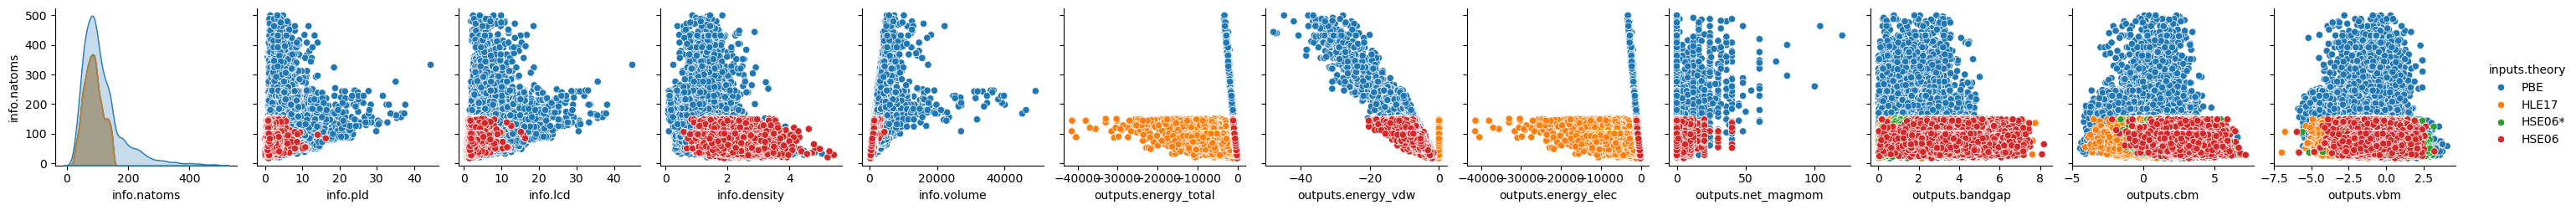

In [76]:
sns.pairplot(df_by_level, y_vars = ['info.natoms'], x_vars = numerical_columns, hue = 'inputs.theory')

<div class="alert alert-block alert-info">
<b>SN:</b> Can be a bias but... As you've mentioned smaller MOFs seem to span the full range of at least the structural (info.pld, info.lcd, info.density) properties. The largest discrepancy is seen for the energy distributions (outputs.energy_total, outputs.energy_vdw, outputs.energy_elec). However, as these represent stability of MOF and won't have a direct impact on band gaps we might be able to drop these columns with energetics. <b>Important question is are there different/distinct trends in band gaps between smaller and larger MOFs? Do large MOFs systematically have lower or higher band gaps?</b> At PBE level there seems to be a good overlap between band gaps for large and small MOFs. Also from domain knowledge I don't think this is the case.

In periodic DFT calculations, the system is modeled as an <i>infinite crystal</i>, so in principal physical size of the unit cell (info.natoms) shoudn't matter. What matters is the electronic structure of MOF or the chemistry of local environments. i. e. metal centers, linker conjugation, and metal-linker interactions (we weill need to generate faetures to reflect these)
</div>

In [77]:
df_by_level.head()

qmof_id info.mofid.smiles_nodes  \
0  qmof-8a95c27   ['O', '[Ba]', '[Cu]']   
1  qmof-019ba28                     NaN   
2  qmof-830ed1c                ['[Co]']   
3  qmof-5bd4a24                ['[Co]']   
4  qmof-644aab4            ['[Zn][Zn]']   

                           info.mofid.smiles_linkers  \
0                                        ['[O-]C=O']   
1                                                NaN   
2                              ['[O-]C(=O)c1ccncc1']   
3                              ['[O-]C(=O)c1ccncc1']   
4  ['[O-]C(=O)c1cccc(c1)c1nccs1', 'n1ccc(cc1)c1cc...   

                                   info.mofid.smiles  info.natoms  info.pld  \
0                                O.[Ba].[Cu].[O-]C=O           39   0.68822   
1                                                NaN          128   1.18570   
2                             [Co].[O-]C(=O)c1ccncc1          108   2.36128   
3                             [Co].[O-]C(=O)c1ccncc1          108   2.14542   
4  [O-]C(=O)c1cccc(c1)c1nccs1.[Zn][Zn].n1ccc(cc1)...          102   1.33452   

   info.lcd  info.density  info.volume inputs.theory  ...  \
0   1.35480      2.763246   408.857471           PBE  ...   
1   2.13507      3.229952  1781.965032           PBE  ...   
2   4.21176      1.557644  1292.643180           PBE  ...   
3   3.27957      1.616139  1245.856916           PBE  ...   
4   2.03948      1.596537  1148.155557           PBE  ...   

   outputs.energy_elec  outputs.net_magmom  outputs.bandgap  outputs.cbm  \
0          -235.272007                 1.0         0.632527     1.237645   
1          -656.065494                 0.0         1.134232     3.430440   
2          -751.387618                12.0         0.345448     1.091140   
3          -751.263482                12.0         0.342645     1.308492   
4          -691.920725                 0.0         1.973007     1.855009   

   outputs.vbm  outputs.directgap           outputs.bandgap_spins  \
0     0.605118              False  [3.678962, 0.6325270000000001]   
1     2.296208              False                    [None, None]   
2     0.745692              False  [1.5779139999999998, 0.345448]   
3     0.965847               True  [1.5379300000000002, 0.342645]   
4    -0.117998              False                    [None, None]   

      outputs.cbm_spins     outputs.vbm_spins outputs.directgap_spins  
0  [3.982388, 1.237645]  [0.303426, 0.605118]          [False, False]  
1          [None, None]          [None, None]            [None, None]  
2   [2.129129, 1.09114]  [0.551215, 0.745692]           [True, False]  
3  [2.276219, 1.308492]  [0.738289, 0.965847]            [True, True]  
4          [None, None]          [None, None]            [None, None]  

[5 rows x 23 columns]

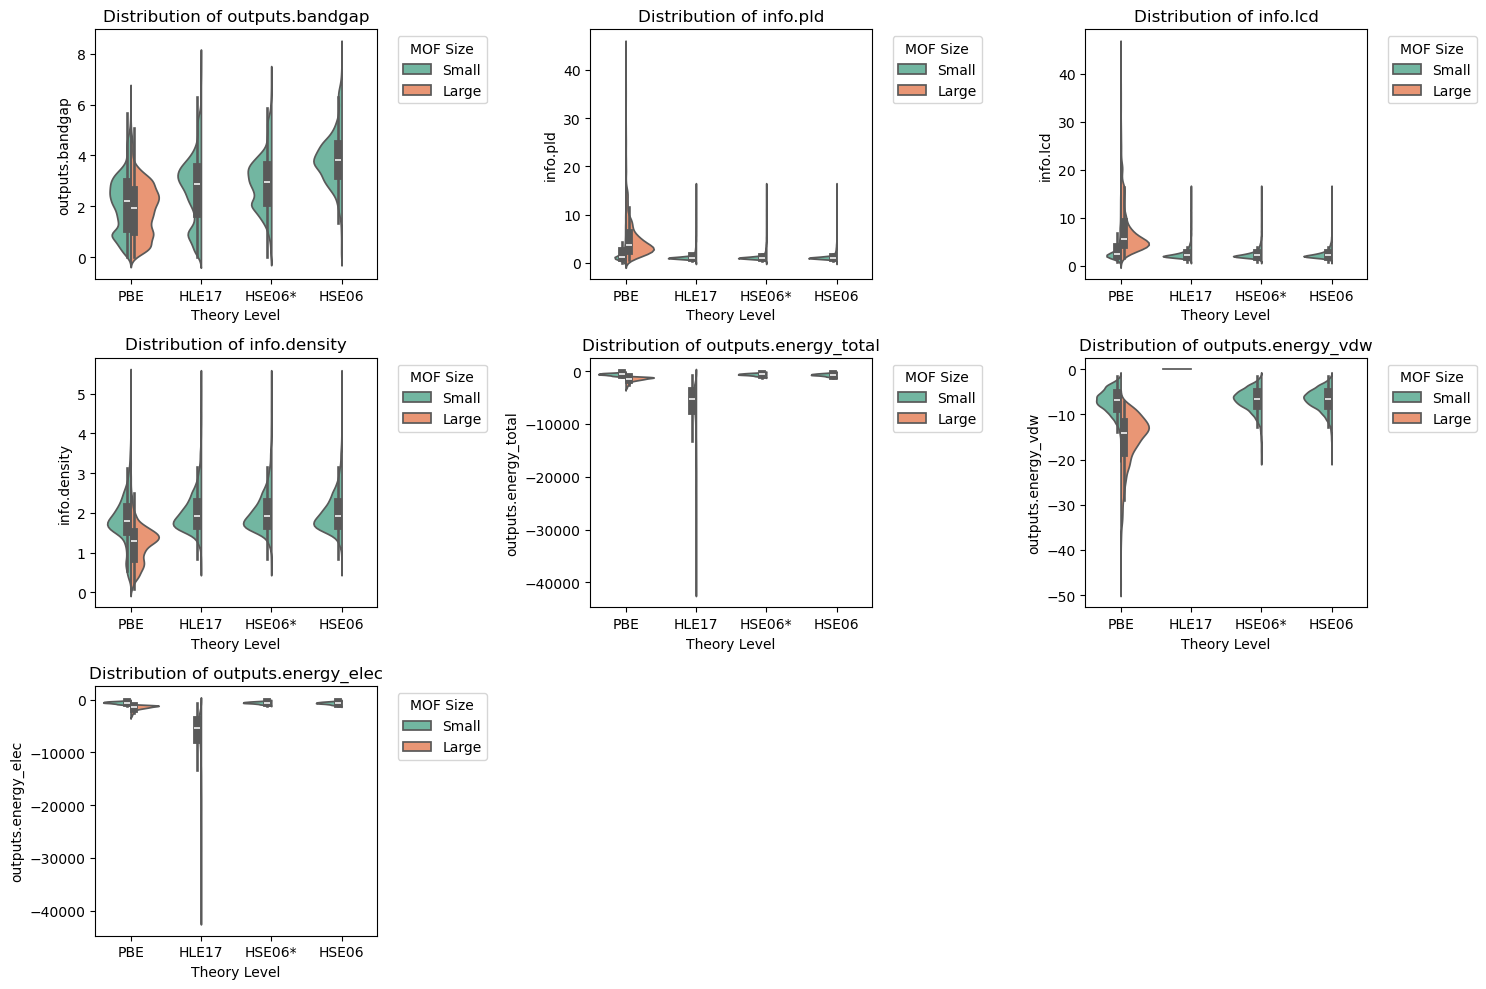

In [78]:
# Split the dataset based on the number of atoms
small_mofs = df_by_level[df_by_level['info.natoms'] <= 150]
large_mofs = df_by_level[df_by_level['info.natoms'] > 150]

# List of properties to compare
properties = [
    'outputs.bandgap',
    'info.pld',
    'info.lcd',
    'info.density',
    'outputs.energy_total',
    'outputs.energy_vdw',
    'outputs.energy_elec'
]

# Create a new column to indicate the size category
df_by_level['MOF_size'] = ['Small' if x <= 150 else 'Large' for x in df_by_level['info.natoms']]

# Plot violin plots for each property
plt.figure(figsize=(15, 10))

for i, prop in enumerate(properties, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='inputs.theory', y=prop, hue='MOF_size', data=df_by_level, palette="Set2", split=True)
    plt.title(f'Distribution of {prop}')
    plt.xlabel('Theory Level')
    plt.ylabel(prop)
    plt.legend(title='MOF Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### a formulaic relationship - bandgap, CBM and VBM:

Going back to the main targert variable for now: __outputs.bandgap__ has the most apparant linear trend against __outputs.cmb__ and __outputs.vbm__. But that is for a very good (or bad, depending on your prespective) reason! Per the '22 QMOF paper (p. 7, top of second column), for "closed-shell" materials, the band gap is defined to be the difference between the conduction band minimum (CBM) and the valence band maximum (VBM). With the exception of one outlier, that is true for all data here:

<Axes: xlabel='inputs.theory', ylabel='None'>

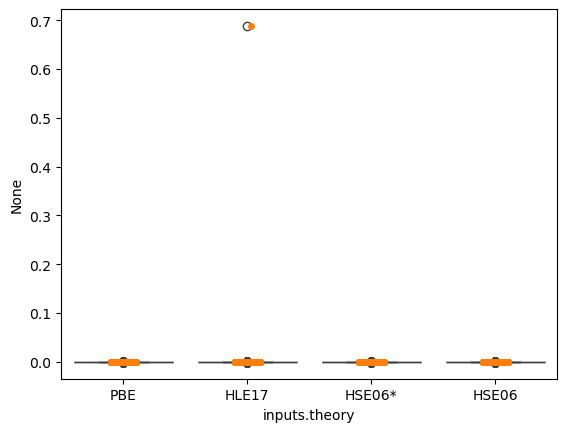

In [79]:
sns.boxplot(y = df_by_level['outputs.bandgap'] - (df_by_level['outputs.cbm']-df_by_level['outputs.vbm']), x = df_by_level['inputs.theory'] )
sns.stripplot(y = df_by_level['outputs.bandgap'] - (df_by_level['outputs.cbm']-df_by_level['outputs.vbm']), x = df_by_level['inputs.theory'] )

Also from the paper, "open-shell" / "spin-polarized" (not clear to me: are these terms equivalent, or is one a subclass of the other?) materials have two values for each CBM and VBM, one for spin-up and one for spin-down. One definition of the bandgap is then the minimum of two CMB values minus the maximum of the two VBM values. The spin-up and spin-down versions of each variable seem to be recorded under __outputs.cbm_spins__ and __outputs.vbm_spins__. It looks like the authors dediced in these cases to record the minimum CMB in __outputs.cbm__ and the maximum VBM in __outputs.cbm__:

In [80]:
df_spin_polarized = df_by_level[df_by_level['outputs.vbm_spins'] != '[None, None]']
print([
    # maximum difference (across rows) between cbm and the minimum of the two values in cmb_spins
    max([
        abs(row['outputs.cbm'] - min(eval(row['outputs.cbm_spins'])))
        for (i, row) in df_spin_polarized.iterrows()
    ]),
    # maximum difference (across rows) between vbm and the maximum of the two values in vmb_spins
    max([
        abs(row['outputs.vbm'] - max(eval(row['outputs.vbm_spins'])))
        for (i, row) in df_spin_polarized.iterrows()
    ])
]) # both should be 0.0

[0.0, 0.0]


So it is still consistent to define bandgap = CBM - VBM, as is reflected in the above plot, which shows that this definition holds for all (even the open-shell) systems. Note: the authors discuss an alternative definition of band gap for spin-polarized systems around Figure 4 in their SI. The alternative definition is related to the values in __outputs.bandgap_spins__. The spin-up value in __outputs.bandgap_spins__ is the difference between the spin-up CBM and spin-up VBM and simiarly for the spin-down value:

In [81]:
max([
    np.linalg.norm(np.array(eval(row['outputs.bandgap_spins'])) - (np.array(eval(row['outputs.cbm_spins'])) - np.array(eval(row['outputs.vbm_spins']))))
    for (i, row) in df_spin_polarized.iterrows()
]) # should be 0.0

np.float64(0.0)

The alternative definition of the bandgap is the minimum of the spin-up and spin-down bandgaps, which need not be the same as value from the first definition, which is in __outputs.bandgap__:

In [82]:
max([
    abs(row['outputs.bandgap'] - min(eval(row['outputs.bandgap_spins'])))
    for (i, row) in df_spin_polarized.iterrows()
    ]
   ) # is not 0.0 because of difference in definitions of band gap

1.8532559999999998

<div class="alert alert-block alert-info">
<b>SN:</b> Closed shell --> no spin-polarization=spin-up and spin-down states of same energy --> only one band gap --> 

$$\mathrm{CBM} - \mathrm{VBM}$$

Open shell --> spin-polarization --> spin-up and spin-down states have different energies --> multiple possible band gaps --> Choose based on optically allowed transitions
$$\min\left( \mathrm{CBM}_\uparrow ,\mathrm{CBM}_\downarrow \right) - \max\left( \mathrm{VBM}_\uparrow ,\mathrm{VBM}_\downarrow \right)$$
if above leads to spin-forbidden transition (electronic transitions that do not contribute to optical absorption or emission under normal circumstances. Thus do not reflect physically relevant absorption properties which are spin-allowed), use below:
$$\min\left( {\mathrm{CBM}_ \uparrow - \mathrm{VBM}_ \uparrow ,\mathrm{CBM}_ \downarrow - \mathrm{VBM}_ \downarrow } \right)$$

Following Figure from <b>QMOF'22</b> shows regardless of the band gap definition used, overall trends remain unchanged.
</div>

<div style="text-align: center;">
    <img src="figure.png" alt="Figure description" width="500">
    <p><b>Figure 1:</b> Band gaps and spin channels.</p>
</div>

#### another formulaic relationship - energy:
Not surprising that total energy = electron (?) energy + Van der Waals energy.
__outputs.energy_total__ seems to be the sum of __outputs.energy_elec__ and __outputs.energy_vdw__ up to discretization error.

<Axes: xlabel='inputs.theory', ylabel='None'>

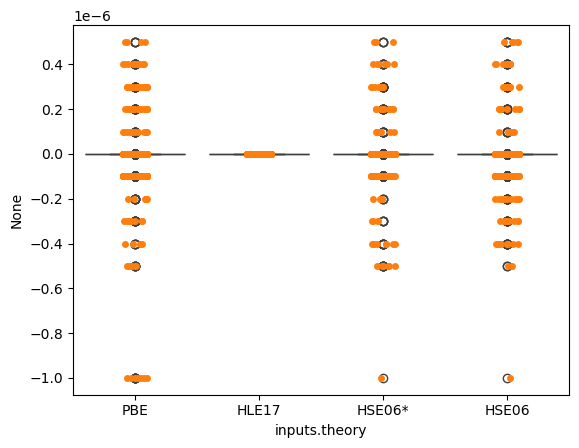

In [83]:
sns.boxplot(y = df_by_level['outputs.energy_total'] - df_by_level['outputs.energy_elec'] - df_by_level['outputs.energy_vdw'], x = df_by_level['inputs.theory'] )
sns.stripplot(y = df_by_level['outputs.energy_total'] - df_by_level['outputs.energy_elec'] - df_by_level['outputs.energy_vdw'], x = df_by_level['inputs.theory'] )

#### HLE17 and energy:
Why do the outliers not appear for HLE17? Looking at the pair plots above, HLE17 has large (in magnitude) values for total energy and electron energy relative to the other levels of theory but near 0 Van der Waals energy. Actually exactly 0 Van der Waals energy:

<div class="alert alert-block alert-info">
<b>SN:</b> That is because other DFAs use what's called a vdW correction (D3-BJ), to account for dispersion/vdW interactions. HLE17 does not have this correction, thus 0 vdW energy contribution.
</div>

In [84]:
df_by_level.groupby('inputs.theory')['outputs.energy_vdw'].min()

inputs.theory
HLE17      0.00000
HSE06    -20.31142
HSE06*   -20.31142
PBE      -47.89654
Name: outputs.energy_vdw, dtype: float64

<Axes: xlabel='inputs.theory', ylabel='outputs.energy_vdw'>

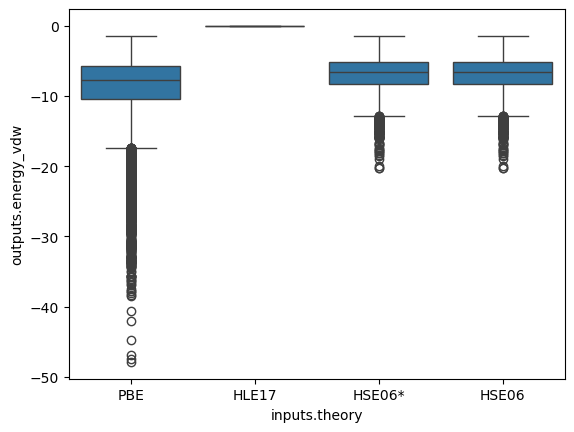

In [85]:
sns.boxplot(y = df_by_level['outputs.energy_vdw'], x = df_by_level['inputs.theory'] )

<Axes: xlabel='inputs.theory', ylabel='outputs.energy_total'>

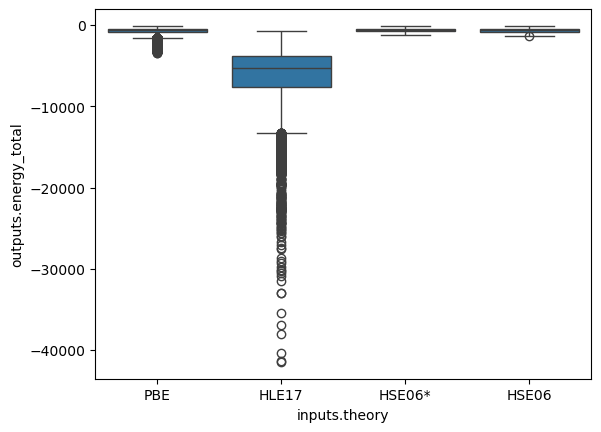

In [86]:
sns.boxplot(
    data = df_by_level, y = 'outputs.energy_total',x = 'inputs.theory'
)

What is it about the HLE17 level of theory that give these extreme values? And is it important to the band gap? Here are the energy - bandgap pair plots again, excluding the HLE17 values:

<div class="alert alert-block alert-info">
<b>SN:</b> Not important to the band gap, we can exclude energies.
</div>

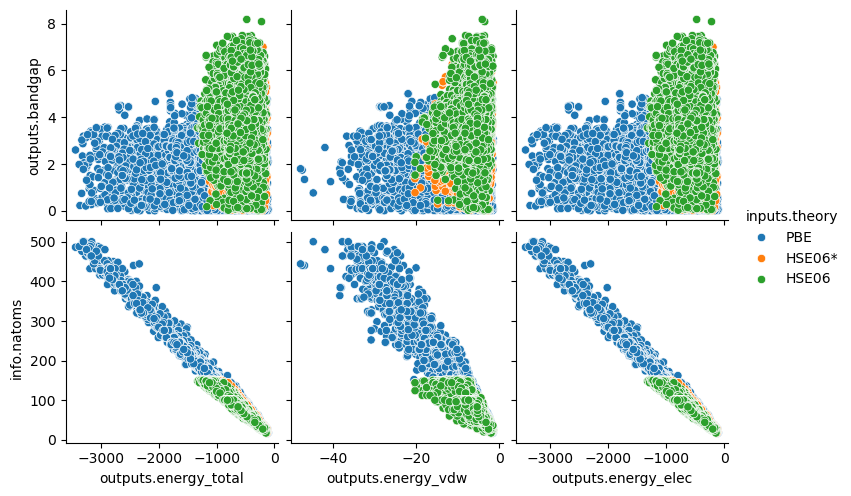

In [87]:
sns.pairplot(df_by_level[df_by_level['inputs.theory'] != "HLE17"], y_vars = ['outputs.bandgap', 'info.natoms'], x_vars = ['outputs.energy_total','outputs.energy_vdw','outputs.energy_elec'], hue = 'inputs.theory')

There doesn't seem to be a strong correlation between energy and band gap. But (not surprisingly) energy scales with number of atoms for these three levels of theory.

#### Pair plots of bandgap vs. data scaled by number of atoms:
Are any further correlations revealed if one first normalizes the "extensive" variables by number of atoms?

In [88]:
extensive_columns = ['info.pld', 'info.lcd', 'info.volume', 'outputs.energy_total', 'outputs.energy_vdw', 'outputs.energy_elec']
df_by_level_per_atom = df_by_level.copy()
for col in extensive_columns:
    df_by_level_per_atom[col] = df_by_level_per_atom[col] / df_by_level_per_atom['info.natoms']


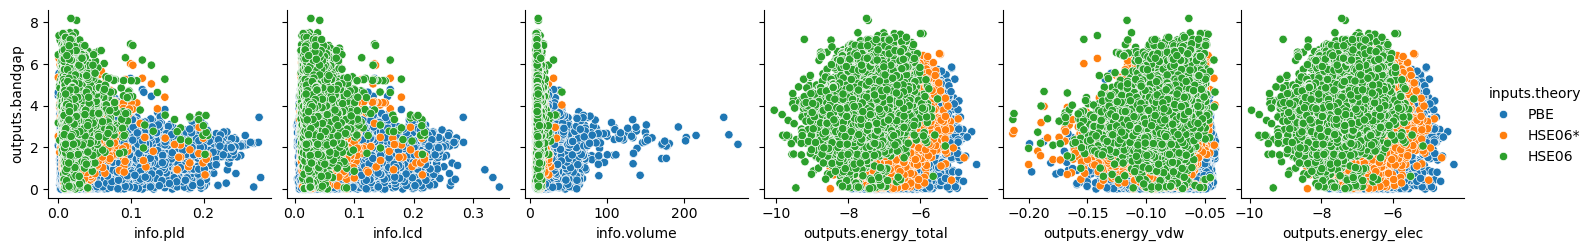

In [89]:
sns.pairplot(df_by_level_per_atom[df_by_level_per_atom['inputs.theory'] != "HLE17"], y_vars = ['outputs.bandgap'], x_vars = extensive_columns, hue = 'inputs.theory')

There doesn't seem to any strong relationships here.

<div class="alert alert-block alert-info">
<b>SN:</b> Not important to the band gap, we can exclude energies.
</div>

### exploration of categorical data: closed- vs. open-shell
reproduced Figure 2a from the '22 QMOF paper:

In [90]:
df_by_level['is_closed_shell'] = (df_by_level['outputs.bandgap_spins'] == '[None, None]')

<Axes: xlabel='inputs.theory', ylabel='outputs.bandgap'>

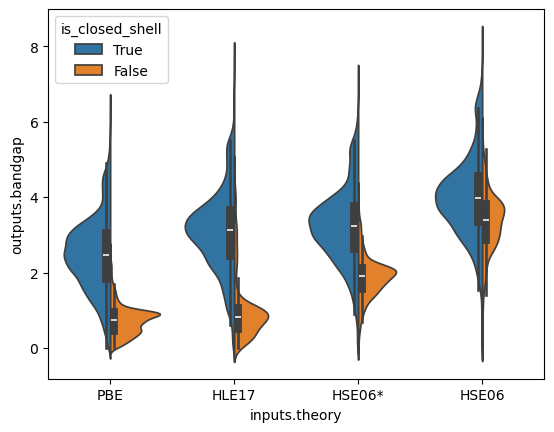

In [91]:
sns.violinplot(
    data = df_by_level, y = 'outputs.bandgap', x = 'inputs.theory',
    split = True, hue = 'is_closed_shell', hue_order = [True, False]
)

Does separating close and open reveal any realtionship between the numerical variables?

<div class="alert alert-block alert-info">
<b>SN:</b> Mainly, PBE has a shortcoming that it predicts differently for closed- and open-shell systems, which shoudn't be the case. HSE06 can alleviate this.
</div>

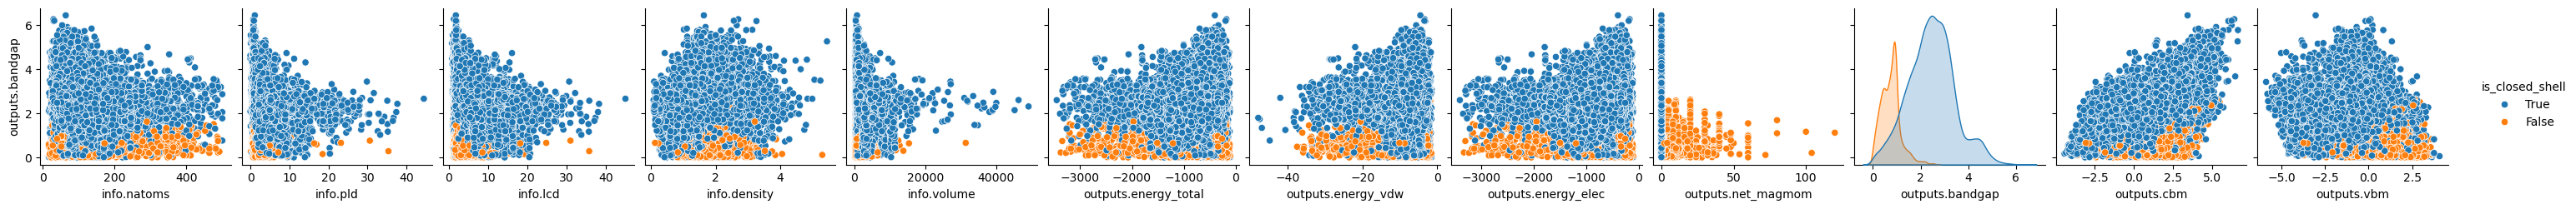

In [92]:
sns.pairplot(
    df_by_level[df_by_level['inputs.theory']=="PBE"],
    y_vars = ['outputs.bandgap'],
    x_vars = numerical_columns,
    hue = 'is_closed_shell', hue_order = [True, False]
)

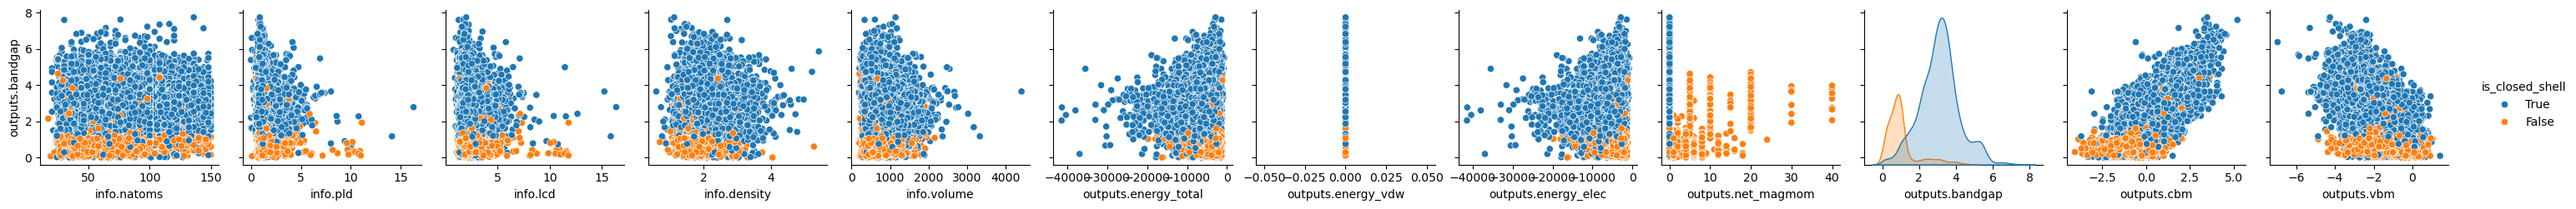

In [93]:
sns.pairplot(
    df_by_level[df_by_level['inputs.theory']=="HLE17"],
    y_vars = ['outputs.bandgap'],
    x_vars = numerical_columns,
    hue = 'is_closed_shell', hue_order = [True, False]
)

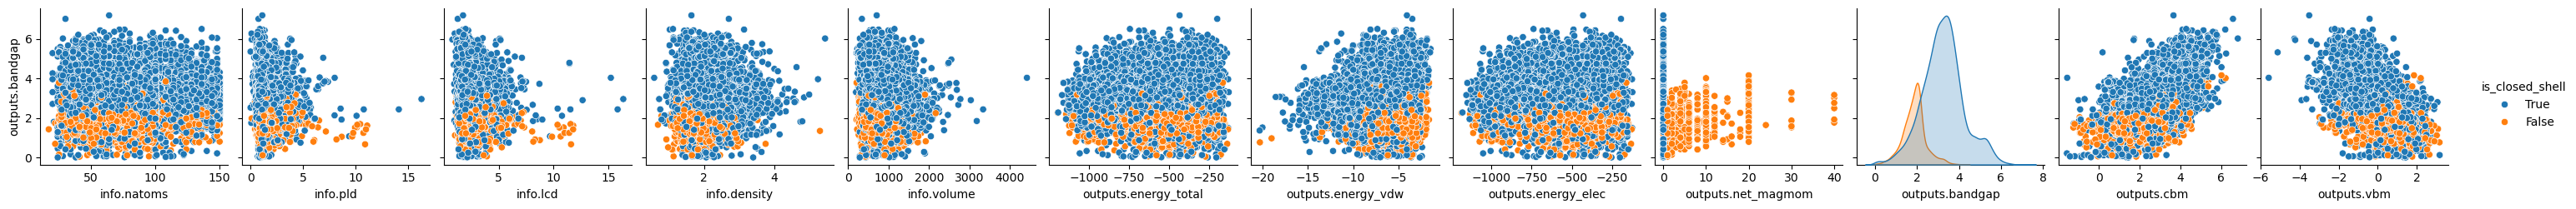

In [94]:
sns.pairplot(
    df_by_level[df_by_level['inputs.theory']=="HSE06*"],
    y_vars = ['outputs.bandgap'],
    x_vars = numerical_columns,
    hue = 'is_closed_shell', hue_order = [True, False]
)

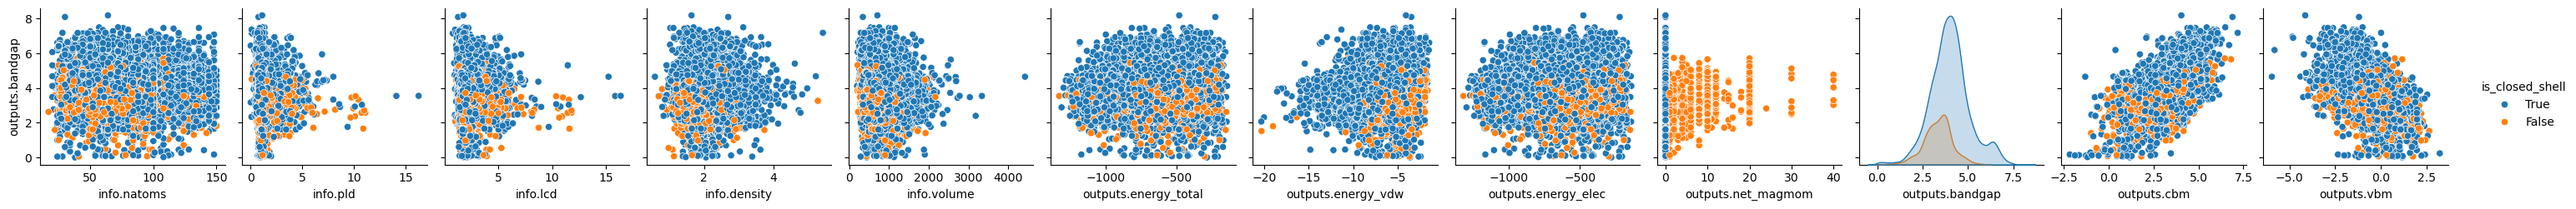

In [95]:
sns.pairplot(
    df_by_level[df_by_level['inputs.theory']=="HSE06"],
    y_vars = ['outputs.bandgap'],
    x_vars = numerical_columns,
    hue = 'is_closed_shell', hue_order = [True, False]
)

Not really - the only thing of note is, as might be expected, closed-shell systems have 0 magnetic moment:

<div class="alert alert-block alert-info">
<b>SN:</b> Expected result. Closed-shell systems --> no unpaired electrons --> no net spin-polarization --> non-magnetic
</div>

<Axes: xlabel='is_closed_shell', ylabel='outputs.net_magmom'>

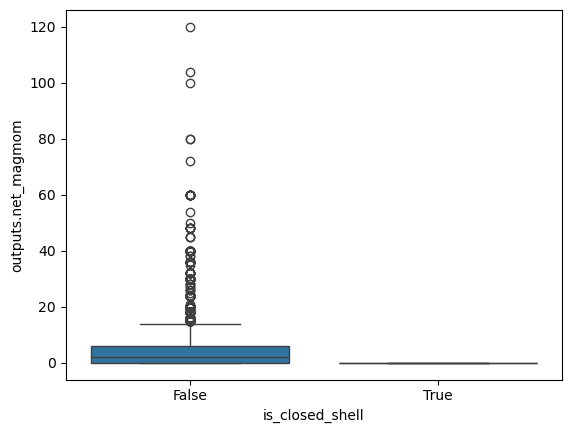

In [96]:
sns.boxplot(df_by_level, y = 'outputs.net_magmom', x = 'is_closed_shell')

## Method 1: one MOF = one data point
... restricted to MOFs with all four levels of theory available

In [97]:
df_4_levels = df.copy()
df_4_levels.dropna(subset = ['inputs.' + level + '.theory' for level in dft_levels])

qmof_id        name        info.formula info.formula_reduced  \
4      qmof-644aab4  ABAXUZ_FSR     Zn2C50H32N6O8S4       ZnC25H16N3O4S2   
13     qmof-85a8986  ABEWUB_FSR      Dy4C28H32N8O36           DyC7H8N2O9   
26     qmof-07d3562  ABIVOY_FSR      Ba4C32H48O44S4          BaC8H12O11S   
27     qmof-9883029  ABIWAL_FSR      Cd2C56H52N16O8         CdC28H26N8O4   
29     qmof-f224151  ABIWUF_FSR     Cd2C56H56I4N4O4       CdC28H28I2N2O2   
...             ...         ...                 ...                  ...   
15951  qmof-f73a75b  YOVGEX_FSR        FeC34H24N6S2         FeC34H24N6S2   
15954  qmof-600a106  YOVZAL_FSR      Cu4C28H20N12O2         Cu2C14H10N6O   
15955  qmof-64eac3c  YOWCOE_FSR      Zn2C30H26N2O14          ZnC15H13NO7   
15959  qmof-92305e2  YOXJIG_FSR  Nd2C32Cl2H32N20O12      NdC16ClH16N10O6   
15961  qmof-55d409b  YOYFEY_FSR        CuC36H36N4O6         CuC36H36N4O6   

                                        info.mofid.mofid  \
4                                                    NaN   
13                                                   NaN   
26                                                   NaN   
27     [Cd].n1cc([nH]c1)c1ccc(cc1)c1[nH]cnc1 MOFid-v1...   
29                                                   NaN   
...                                                  ...   
15951  [Fe].n1ccc(cc1)c1ccc(cc1)c1ccncc1 MOFid-v1.sql...   
15954                                                NaN   
15955                                                NaN   
15959                                                NaN   
15961                                                NaN   

                     info.mofid.mofkey    info.mofid.smiles_nodes  \
4                                  NaN               ['[Zn][Zn]']   
13                                 NaN  ['[OH2][Dy]([OH2])[OH2]']   
26                                 NaN              ['O', '[Ba]']   
27     Cd.POSVDPHCDPQXKI.MOFkey-v1.sql                   ['[Cd]']   
29                                 NaN                 ['I[Cd]I']   
...                                ...                        ...   
15951  Fe.MAWKLXRVKVOYLR.MOFkey-v1.sql                   ['[Fe]']   
15954                              NaN                        NaN   
15955                              NaN                        NaN   
15959                              NaN         ['[OH2][Nd][OH2]']   
15961                              NaN                   ['[Cu]']   

                               info.mofid.smiles_linkers  \
4      ['[O-]C(=O)c1cccc(c1)c1nccs1', 'n1ccc(cc1)c1cc...   
13     ['[O-]C(=O)C(=O)[O-]', '[O-]C(=O)c1ncnc(c1)C(=...   
26         ['[O-]C(=O)c1cc(cc(c1)S([O])([O])[O])C(=O)O']   
27                  ['n1cc([nH]c1)c1ccc(cc1)c1[nH]cnc1']   
29     ['COc1c(cc(c(c1c1c(C)c(C)cc(c1OC)c1ccncc1)C)C)...   
...                                                  ...   
15951                   ['n1ccc(cc1)c1ccc(cc1)c1ccncc1']   
15954                                                NaN   
15955                                                NaN   
15959                    ['[O-]C(=O)Cn1nnc(n1)c1cccnc1']   
15961           ['Cc1nc2c(n1CCCCn1c(C)nc3c1cccc3)cccc2']   

                                       info.mofid.smiles info.mofid.topology  \
4      [O-]C(=O)c1cccc(c1)c1nccs1.[Zn][Zn].n1ccc(cc1)...                 NaN   
13     [O-]C(=O)C(=O)[O-].[O-]C(=O)c1ncnc(c1)C(=O)[O-...                 NaN   
26      O.[Ba].[O-]C(=O)c1cc(cc(c1)S([O])([O])[O])C(=O)O                 NaN   
27                 [Cd].n1cc([nH]c1)c1ccc(cc1)c1[nH]cnc1                 sql   
29     COc1c(cc(c(c1c1c(C)c(C)cc(c1OC)c1ccncc1)C)C)c1...                 NaN   
...                                                  ...                 ...   
15951                  [Fe].n1ccc(cc1)c1ccc(cc1)c1ccncc1                 sql   
15954                                                NaN                 NaN   
15955                                                NaN                 NaN   
15959         [O-]C(=O)Cn1nn

### bandgap correlations across levels of theory 
... with separation of closed- and open-shell systems.
Note: the bottom three subfigures in the first column roughly reproduce Figure 3 from the '22 QMOF paper.

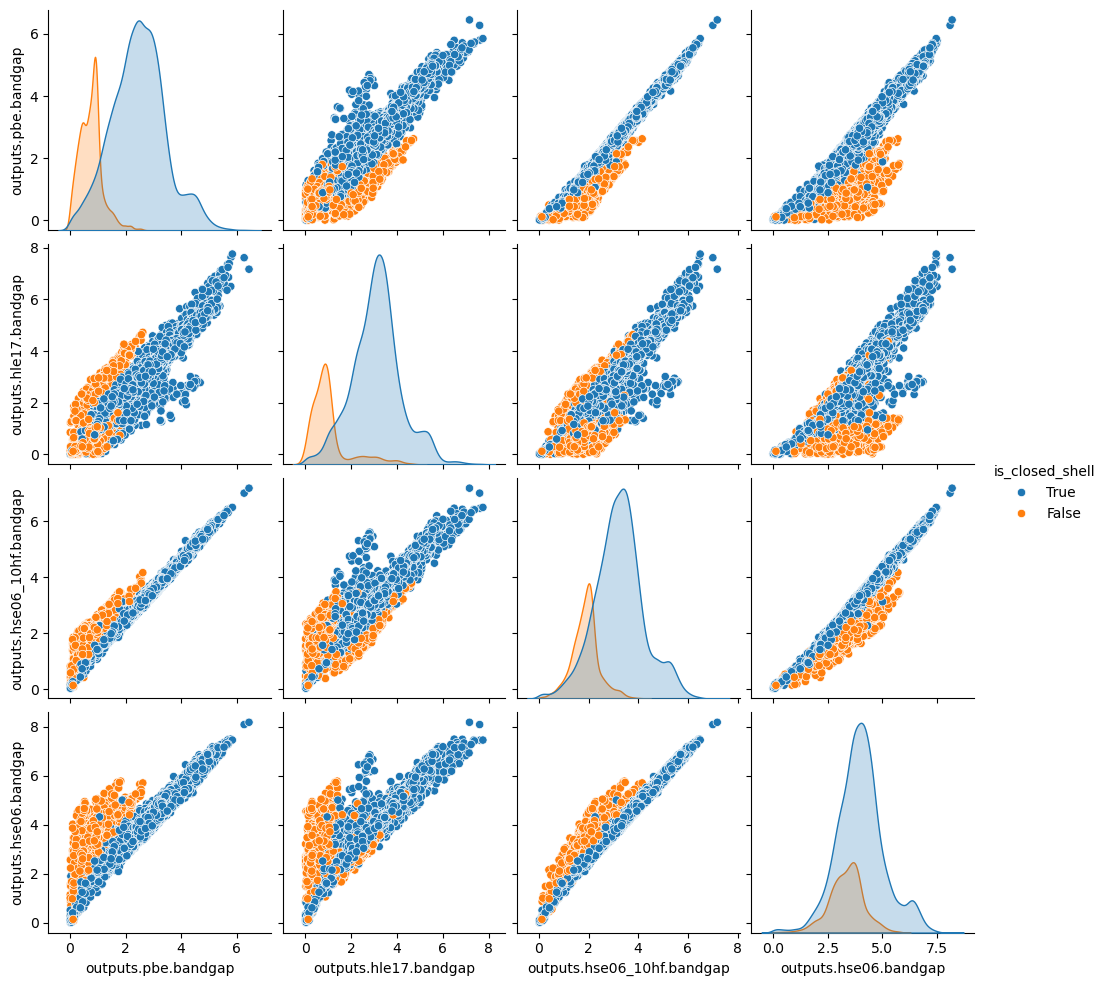

In [98]:
df_4_levels['is_closed_shell'] = (df_4_levels['outputs.pbe.bandgap_spins'] == '[None, None]')
sns.pairplot(
    df_4_levels,
    y_vars = ['outputs.' + level + '.bandgap' for level in dft_levels],
    x_vars = ['outputs.' + level + '.bandgap' for level in dft_levels],
    hue = 'is_closed_shell', hue_order = [True, False])

### correlations between band gap (target) and other input columns across each level of theory

Correlations for outputs.pbe.bandgap:
outputs.pbe.bandgap                1.000000
outputs.hse06_10hf.bandgap         0.971586
outputs.hle17.bandgap              0.946211
outputs.hse06.bandgap              0.839573
outputs.hle17.cbm                  0.677185
outputs.hse06_10hf.cbm             0.568446
outputs.hse06.cbm                  0.495111
outputs.pbe.cbm                    0.461470
info.density                       0.194981
outputs.pbe.energy_elec            0.075135
outputs.pbe.energy_total           0.074954
outputs.pbe.energy_vdw             0.051977
info.symmetry.spacegroup_number    0.027728
outputs.hse06.energy_vdw          -0.011936
outputs.hse06_10hf.energy_vdw     -0.013412
outputs.hse06.energy_total        -0.048707
outputs.hse06_10hf.energy_total   -0.048842
outputs.hse06.energy_elec         -0.049006
outputs.hse06_10hf.energy_elec    -0.049155
info.natoms                       -0.053592
info.volume                       -0.068558
outputs.hle17.energy_elec         -0.1

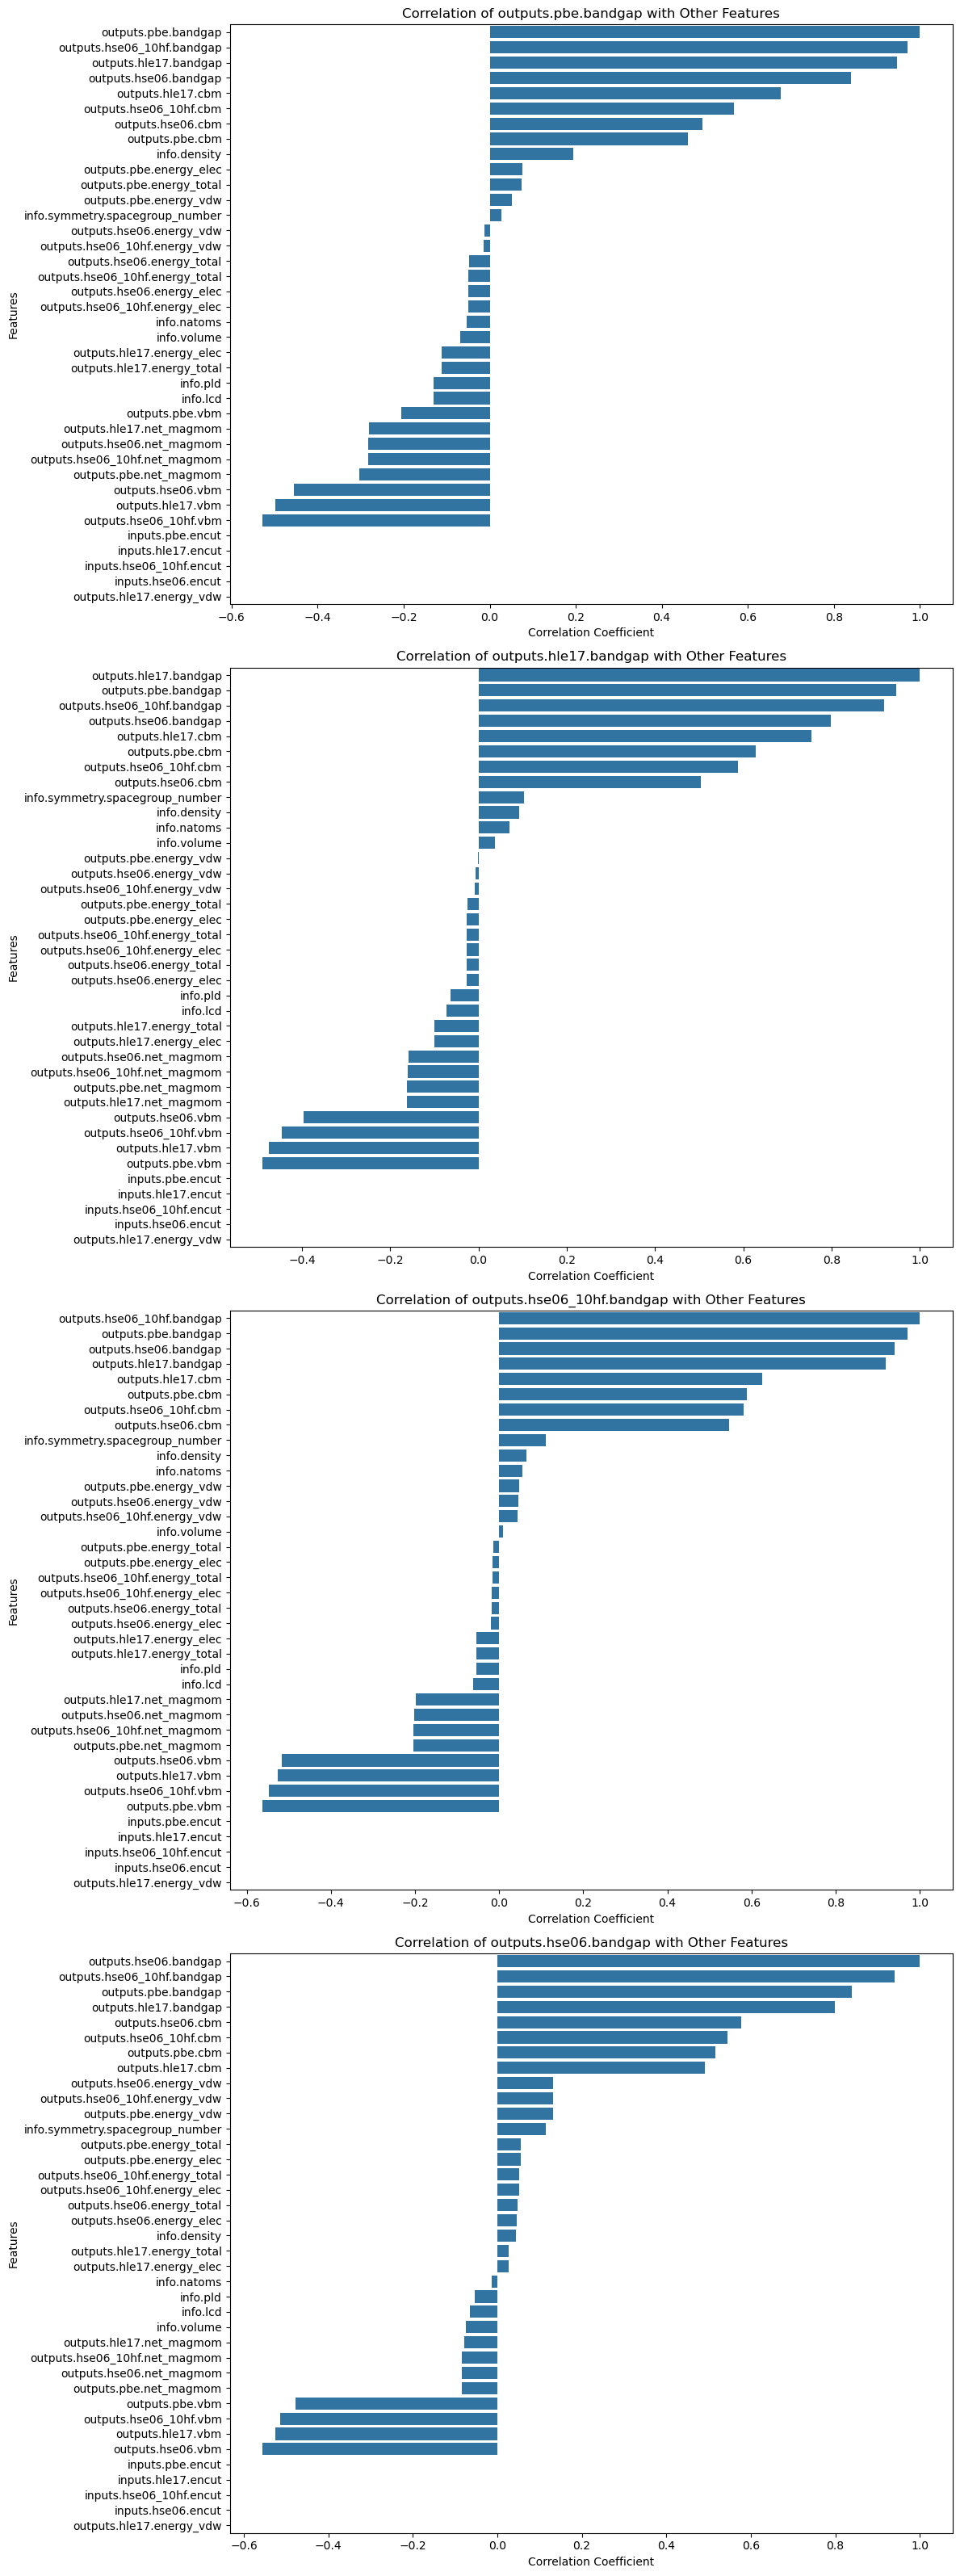

In [99]:
# List of bandgap columns
bandgap_columns = [
    'outputs.pbe.bandgap',
    'outputs.hle17.bandgap',
    'outputs.hse06_10hf.bandgap',
    'outputs.hse06.bandgap'
]

# Filter out non-numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Create subplots
fig, axes = plt.subplots(len(bandgap_columns), 1, figsize=(12, 8 * len(bandgap_columns)))

# Loop through each bandgap column and plot correlations
for i, bandgap_column in enumerate(bandgap_columns):
    if bandgap_column in df_numeric.columns:
        # Calculate correlations
        correlations = df_numeric.corr()[bandgap_column].sort_values(ascending=False)

        # Display the correlations
        print(f'Correlations for {bandgap_column}:')
        print(correlations)

        # Plot the correlations
        sns.barplot(x=correlations.values, y=correlations.index, ax=axes[i])
        axes[i].set_title(f'Correlation of {bandgap_column} with Other Features')
        axes[i].set_xlabel('Correlation Coefficient')
        axes[i].set_ylabel('Features')
    else:
        print(f'{bandgap_column} is not in the numeric columns of the DataFrame.')

plt.tight_layout()
plt.show()

### ...more on correlations 

In [100]:
# Identify column groups
info_column_names = [cn for cn in df.columns if cn in {'qmof_id', 'name'} or cn.startswith('info')]
dft_column_names = [cn for cn in df.columns if cn.startswith(('inputs', 'outputs'))]

# Keep only rows where all DFT columns have values
df_clean = df.dropna(subset=dft_column_names)
df_clean

qmof_id        name        info.formula info.formula_reduced  \
4      qmof-644aab4  ABAXUZ_FSR     Zn2C50H32N6O8S4       ZnC25H16N3O4S2   
13     qmof-85a8986  ABEWUB_FSR      Dy4C28H32N8O36           DyC7H8N2O9   
26     qmof-07d3562  ABIVOY_FSR      Ba4C32H48O44S4          BaC8H12O11S   
27     qmof-9883029  ABIWAL_FSR      Cd2C56H52N16O8         CdC28H26N8O4   
29     qmof-f224151  ABIWUF_FSR     Cd2C56H56I4N4O4       CdC28H28I2N2O2   
...             ...         ...                 ...                  ...   
15951  qmof-f73a75b  YOVGEX_FSR        FeC34H24N6S2         FeC34H24N6S2   
15954  qmof-600a106  YOVZAL_FSR      Cu4C28H20N12O2         Cu2C14H10N6O   
15955  qmof-64eac3c  YOWCOE_FSR      Zn2C30H26N2O14          ZnC15H13NO7   
15959  qmof-92305e2  YOXJIG_FSR  Nd2C32Cl2H32N20O12      NdC16ClH16N10O6   
15961  qmof-55d409b  YOYFEY_FSR        CuC36H36N4O6         CuC36H36N4O6   

                                        info.mofid.mofid  \
4                                                    NaN   
13                                                   NaN   
26                                                   NaN   
27     [Cd].n1cc([nH]c1)c1ccc(cc1)c1[nH]cnc1 MOFid-v1...   
29                                                   NaN   
...                                                  ...   
15951  [Fe].n1ccc(cc1)c1ccc(cc1)c1ccncc1 MOFid-v1.sql...   
15954                                                NaN   
15955                                                NaN   
15959                                                NaN   
15961                                                NaN   

                     info.mofid.mofkey    info.mofid.smiles_nodes  \
4                                  NaN               ['[Zn][Zn]']   
13                                 NaN  ['[OH2][Dy]([OH2])[OH2]']   
26                                 NaN              ['O', '[Ba]']   
27     Cd.POSVDPHCDPQXKI.MOFkey-v1.sql                   ['[Cd]']   
29                                 NaN                 ['I[Cd]I']   
...                                ...                        ...   
15951  Fe.MAWKLXRVKVOYLR.MOFkey-v1.sql                   ['[Fe]']   
15954                              NaN                        NaN   
15955                              NaN                        NaN   
15959                              NaN         ['[OH2][Nd][OH2]']   
15961                              NaN                   ['[Cu]']   

                               info.mofid.smiles_linkers  \
4      ['[O-]C(=O)c1cccc(c1)c1nccs1', 'n1ccc(cc1)c1cc...   
13     ['[O-]C(=O)C(=O)[O-]', '[O-]C(=O)c1ncnc(c1)C(=...   
26         ['[O-]C(=O)c1cc(cc(c1)S([O])([O])[O])C(=O)O']   
27                  ['n1cc([nH]c1)c1ccc(cc1)c1[nH]cnc1']   
29     ['COc1c(cc(c(c1c1c(C)c(C)cc(c1OC)c1ccncc1)C)C)...   
...                                                  ...   
15951                   ['n1ccc(cc1)c1ccc(cc1)c1ccncc1']   
15954                                                NaN   
15955                                                NaN   
15959                    ['[O-]C(=O)Cn1nnc(n1)c1cccnc1']   
15961           ['Cc1nc2c(n1CCCCn1c(C)nc3c1cccc3)cccc2']   

                                       info.mofid.smiles info.mofid.topology  \
4      [O-]C(=O)c1cccc(c1)c1nccs1.[Zn][Zn].n1ccc(cc1)...                 NaN   
13     [O-]C(=O)C(=O)[O-].[O-]C(=O)c1ncnc(c1)C(=O)[O-...                 NaN   
26      O.[Ba].[O-]C(=O)c1cc(cc(c1)S([O])([O])[O])C(=O)O                 NaN   
27                 [Cd].n1cc([nH]c1)c1ccc(cc1)c1[nH]cnc1                 sql   
29     COc1c(cc(c(c1c1c(C)c(C)cc(c1OC)c1ccncc1)C)C)c1...                 NaN   
...                                                  ...                 ...   
15951                  [Fe].n1ccc(cc1)c1ccc(cc1)c1ccncc1                 sql   
15954                                                NaN                 NaN   
15955                                                NaN                 NaN   
15959         [O-]C(=O)Cn1nn

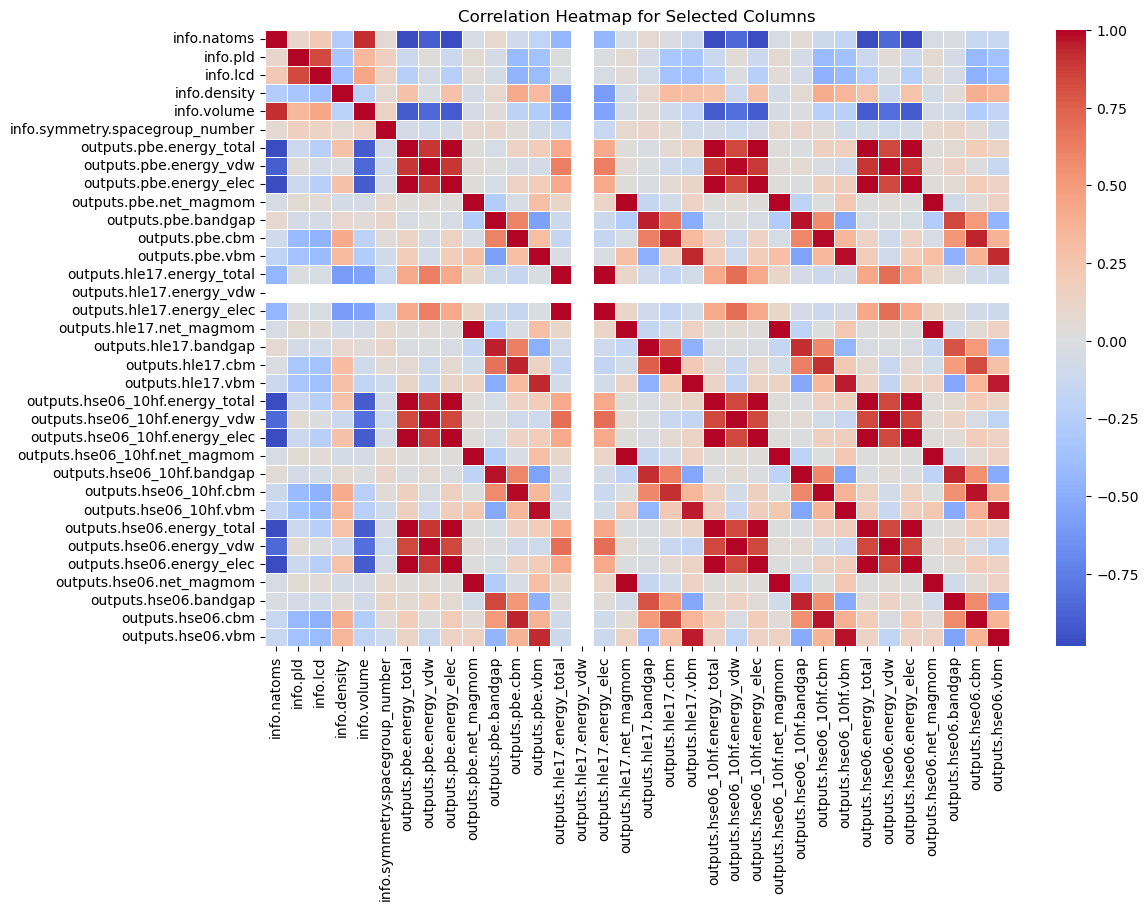

In [101]:
# List of columns to include in the correlation analysis
columns_of_interest = [
       'qmof_id', 'info.natoms', 'info.pld', 'info.lcd', 'info.density',
       'info.volume', 'info.symmetry.spacegroup_number',
       'info.symmetry.spacegroup_crystal', 'inputs.pbe.spin',
       'outputs.pbe.energy_total', 'outputs.pbe.energy_vdw',
       'outputs.pbe.energy_elec', 'outputs.pbe.net_magmom',
       'outputs.pbe.bandgap', 'outputs.pbe.cbm', 'outputs.pbe.vbm',
       'outputs.pbe.directgap', 'inputs.hle17.spin', 'inputs.hse06_10hf.spin',
       'inputs.hse06.spin', 'outputs.hle17.energy_total',
       'outputs.hle17.energy_vdw', 'outputs.hle17.energy_elec',
       'outputs.hle17.net_magmom', 'outputs.hle17.bandgap',
       'outputs.hle17.cbm', 'outputs.hle17.vbm', 'outputs.hle17.directgap',
       'outputs.hse06_10hf.energy_total', 'outputs.hse06_10hf.energy_vdw',
       'outputs.hse06_10hf.energy_elec', 'outputs.hse06_10hf.net_magmom',
       'outputs.hse06_10hf.bandgap', 'outputs.hse06_10hf.cbm',
       'outputs.hse06_10hf.vbm', 'outputs.hse06_10hf.directgap',
       'outputs.hse06.energy_total', 'outputs.hse06.energy_vdw',
       'outputs.hse06.energy_elec', 'outputs.hse06.net_magmom',
       'outputs.hse06.bandgap', 'outputs.hse06.cbm', 'outputs.hse06.vbm',
       'outputs.hse06.directgap'
]

# Filter the DataFrame to include only the columns of interest
df_filtered = df_clean[columns_of_interest]

# Filter the DataFrame to include only numerical columns
df_numerical = df_filtered.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Heatmap for Selected Columns")

# Rotate labels for better visibility
plt.yticks(rotation=0)

plt.show()